## Importing Libraries

In [14]:
!pip install keras

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Input

## Importing Make circle dataset

In [16]:
np.random.seed(42)

n_samples = 1000

# ---------- INNER PURPLE CORE ----------
r_inner = np.random.uniform(0.0, 0.4, n_samples)
theta_inner = np.random.uniform(0, 2*np.pi, n_samples)

x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)

X_inner = np.column_stack((x_inner, y_inner))
y_inner = np.zeros(n_samples)   # Purple


# ---------- MIDDLE YELLOW RING ----------
r_middle = np.random.uniform(0.6, 1.0, n_samples)
theta_middle = np.random.uniform(0, 2*np.pi, n_samples)

x_middle = r_middle * np.cos(theta_middle)
y_middle = r_middle * np.sin(theta_middle)

X_middle = np.column_stack((x_middle, y_middle))
y_middle = np.ones(n_samples)   # Yellow


# ---------- OUTER PURPLE RING ----------
r_outer = np.random.uniform(1.2, 1.6, n_samples)
theta_outer = np.random.uniform(0, 2*np.pi, n_samples)

x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)

X_outer = np.column_stack((x_outer, y_outer))
y_outer = np.zeros(n_samples)   # Purple


# ---------- Combine ----------
X = np.vstack((X_inner, X_middle, X_outer))
y = np.hstack((y_inner, y_middle, y_outer))

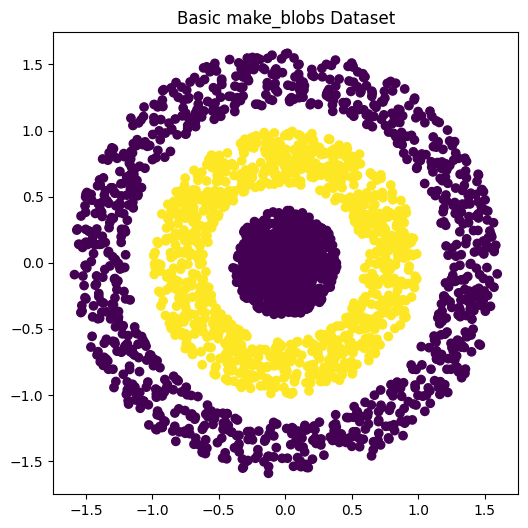

In [17]:
# Visualize
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Basic make_blobs Dataset")
plt.show()

## Train Test Split

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Standardization

In [19]:
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)

## Plot Decision Boundary

In [60]:
def PlotDecisionBoundary(X, y, model):

    # Create mesh grid using X (not X_train)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Prepare grid
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities
    grid_scaled = std_scale.transform(grid)
    Z = model.predict(grid_scaled, verbose=0)

    # Convert to class labels
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

## ANN

In [51]:
model = Sequential([
  Input(shape=(2,)),
  Dense(16 , activation='relu'),
  Dense(1 , activation='sigmoid')
])

In [52]:
model.compile(optimizer='adam' , metrics=["accuracy"], loss='binary_crossentropy')

In [53]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(X_train , y_train , epochs=500 , validation_split=0.2)

Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5533 - loss: 0.6969 - val_accuracy: 0.6271 - val_loss: 0.6722
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6554 - loss: 0.6586 - val_accuracy: 0.6542 - val_loss: 0.6515
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6711 - loss: 0.6389 - val_accuracy: 0.6542 - val_loss: 0.6422
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 0.6249 - val_accuracy: 0.6542 - val_loss: 0.6376
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6499 - loss: 0.6382 - val_accuracy: 0.6542 - val_loss: 0.6350
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6620 - loss: 0.6264 - val_accuracy: 0.6542 - val_loss: 0.6334
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6596 - loss: 0.6261 - val_accuracy: 0.6542 - val_loss: 0.6319
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6683 - loss: 0.6183 - val_accuracy: 0.6542 - v

Text(0.5, 0, 'Epoch')

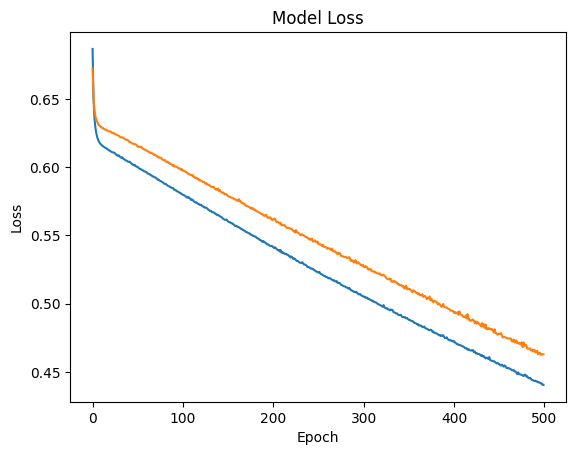

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [56]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


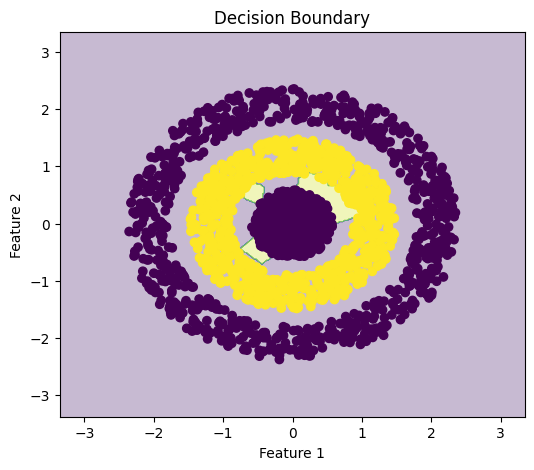

In [58]:
PlotDecisionBoundary(X_train, y_train, model)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 0.7633333333333333
Precision: 1.0
Recall   : 0.27918781725888325
F1 Score : 0.4365079365079365


# DNN

In [83]:
model = Sequential([
    Input(shape=(2,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [84]:
model.compile(optimizer='adam', metrics=["accuracy"] , loss='binary_crossentropy')

In [85]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,217 (98.50 KB)

 Trainable params: 25,217 (98.50 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history = model.fit(X_train , y_train , epochs=10 , validation_split=0.2)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 3.0421e-06 - val_accuracy: 1.0000 - val_loss: 3.7753e-06
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 3.0790e-06 - val_accuracy: 1.0000 - val_loss: 3.5857e-06
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 2.4863e-06 - val_accuracy: 1.0000 - val_loss: 3.5343e-06
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 1.9944e-06 - val_accuracy: 1.0000 - val_loss: 3.3612e-06
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 2.2760e-06 - val_accuracy: 1.0000 - val_loss: 3.3149e-06
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 2.1642e-06 - val_accuracy: 1.0000 - val_loss: 3.0499e-06
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 2.3956e-06 - val_accuracy: 1.0000 - val_loss: 3.0122e-06
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accu

In [96]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


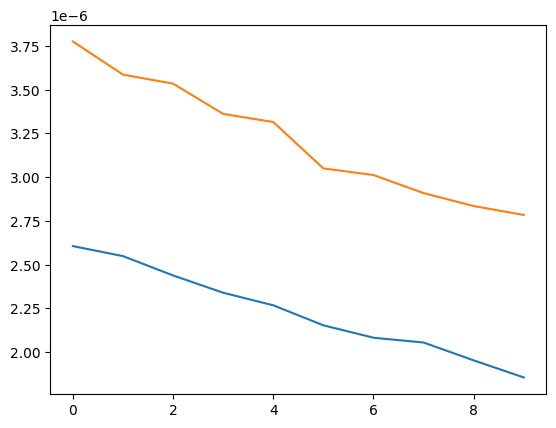

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

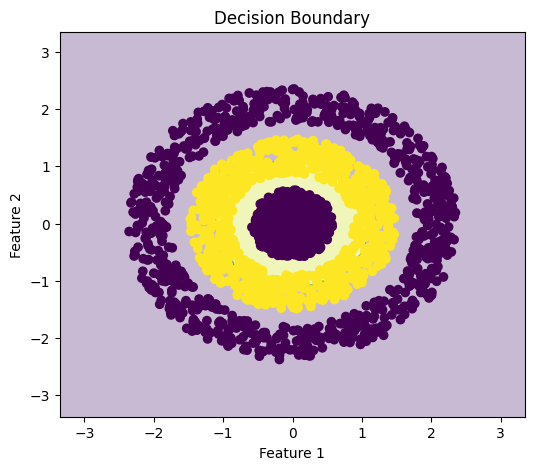

In [98]:
PlotDecisionBoundary(X_train , y_train , model)

In [99]:
y_pred = y_pred.reshape(-1)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0
